# 1. Setup


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
import yaml

In [3]:
zip_file_path = '/content/drive/MyDrive/marine-litter-data.zip'
output_folder = '/content'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)

In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cpu CPU


Setup complete ✅ (96 CPUs, 334.6 GB RAM, 20.5/225.3 GB disk)


# 2. Create yaml

In [5]:
class_names = [
    "tire",
    "spring fish trap",
    "circular fish trap",
    "rectangular fish trap",
    "eel fish trap",
    "fish net",
    "wood",
    "rope",
    "bundle of ropes"
]

data = {
    'train': '/content/marine-litter-data/train/images/',
    'val': '/content/marine-litter-data/val/images/',
    'nc': len(class_names),
    'names': class_names
}

# data.yaml 파일 생성
with open('/content/yolov5/data/data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

In [6]:
%cat /content/yolov5/data/data.yaml

names:
- tire
- spring fish trap
- circular fish trap
- rectangular fish trap
- eel fish trap
- fish net
- wood
- rope
- bundle of ropes
nc: 9
train: /content/marine-litter-data/train/images/
val: /content/marine-litter-data/val/images/


# 3. Train

In [7]:
!python train.py --batch-size 16 --epochs 8 --data data/data.yaml --weights yolov5n.pt --cache

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
        3/7         0G    0.04479    0.02151    0.02859         52        640:  73%|███████▎  | 413/564 [07:17<02:40,  1.06s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        3/7         0G    0.04479    0.02151    0.02859         50        640:  73%|███████▎  | 414/564 [07:18<02:40,  1.07s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        3/7         0G    0.04479     0.0215    0.02858         50        640:  74%|███████▎  | 415/564 [07:19<02:37,  1.06s/it]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        3/

# 4. Result

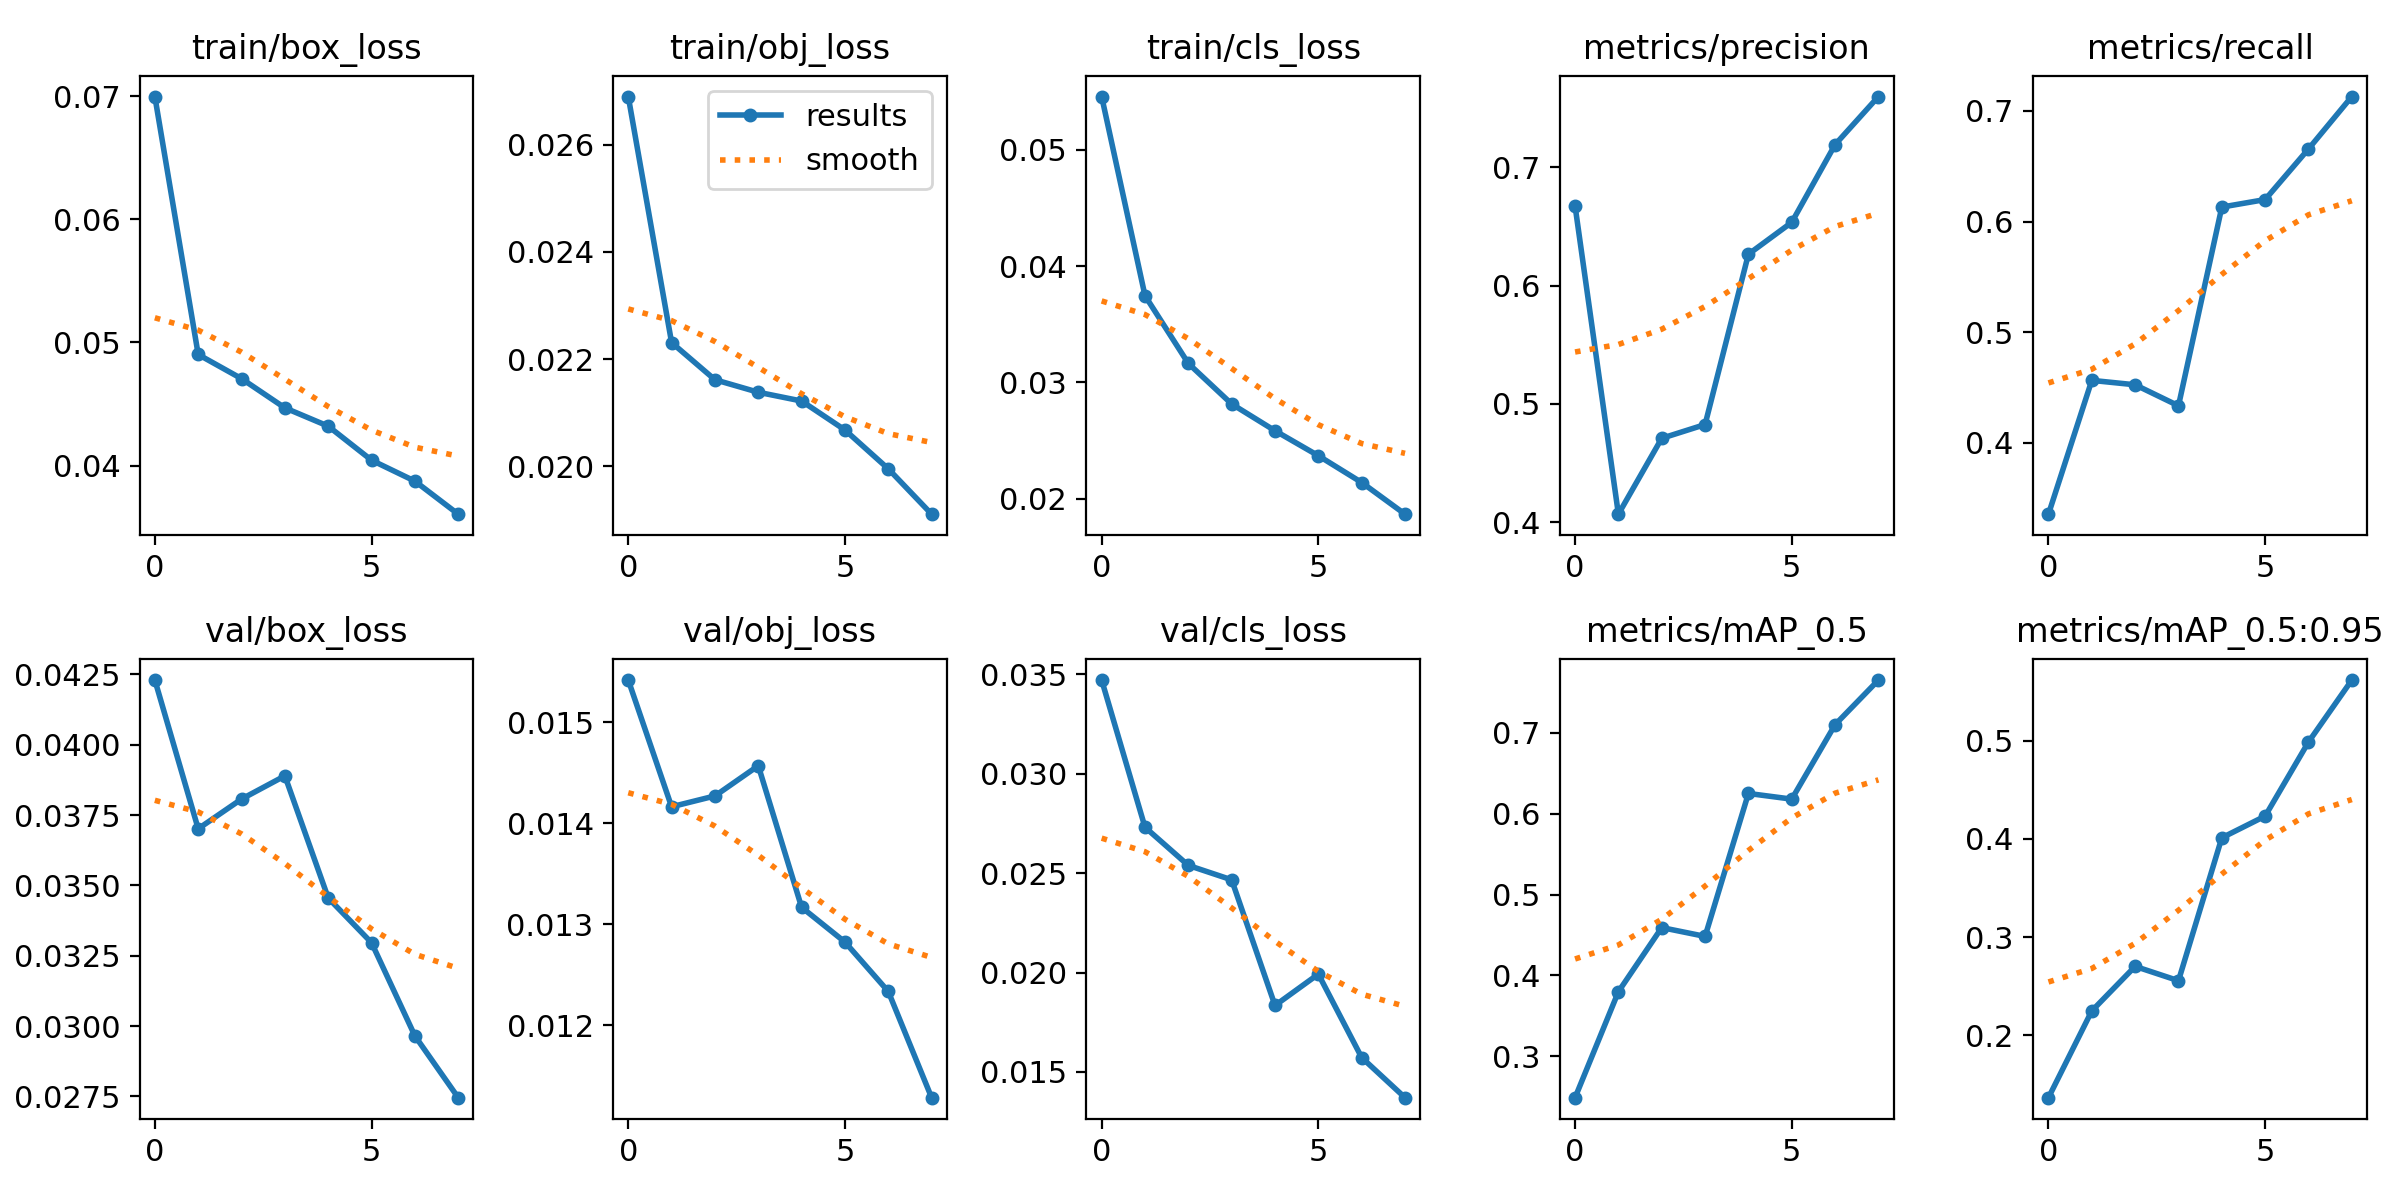

In [11]:
from IPython.display import Image, display
display(Image(filename='./runs/train/exp/results.png'))

detect: weights=['runs/train/exp/weights/best.pt'], source=../marine-litter-data/val/images/circular fish trap_044_04615.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 1771342 parameters, 0 gradients, 4.2 GFLOPs
image 1/1 /content/marine-litter-data/val/images/circular fish trap_044_04615.jpg: 384x640 1 circular fish trap, 47.6ms
Speed: 0.7ms pre-process, 47.6ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


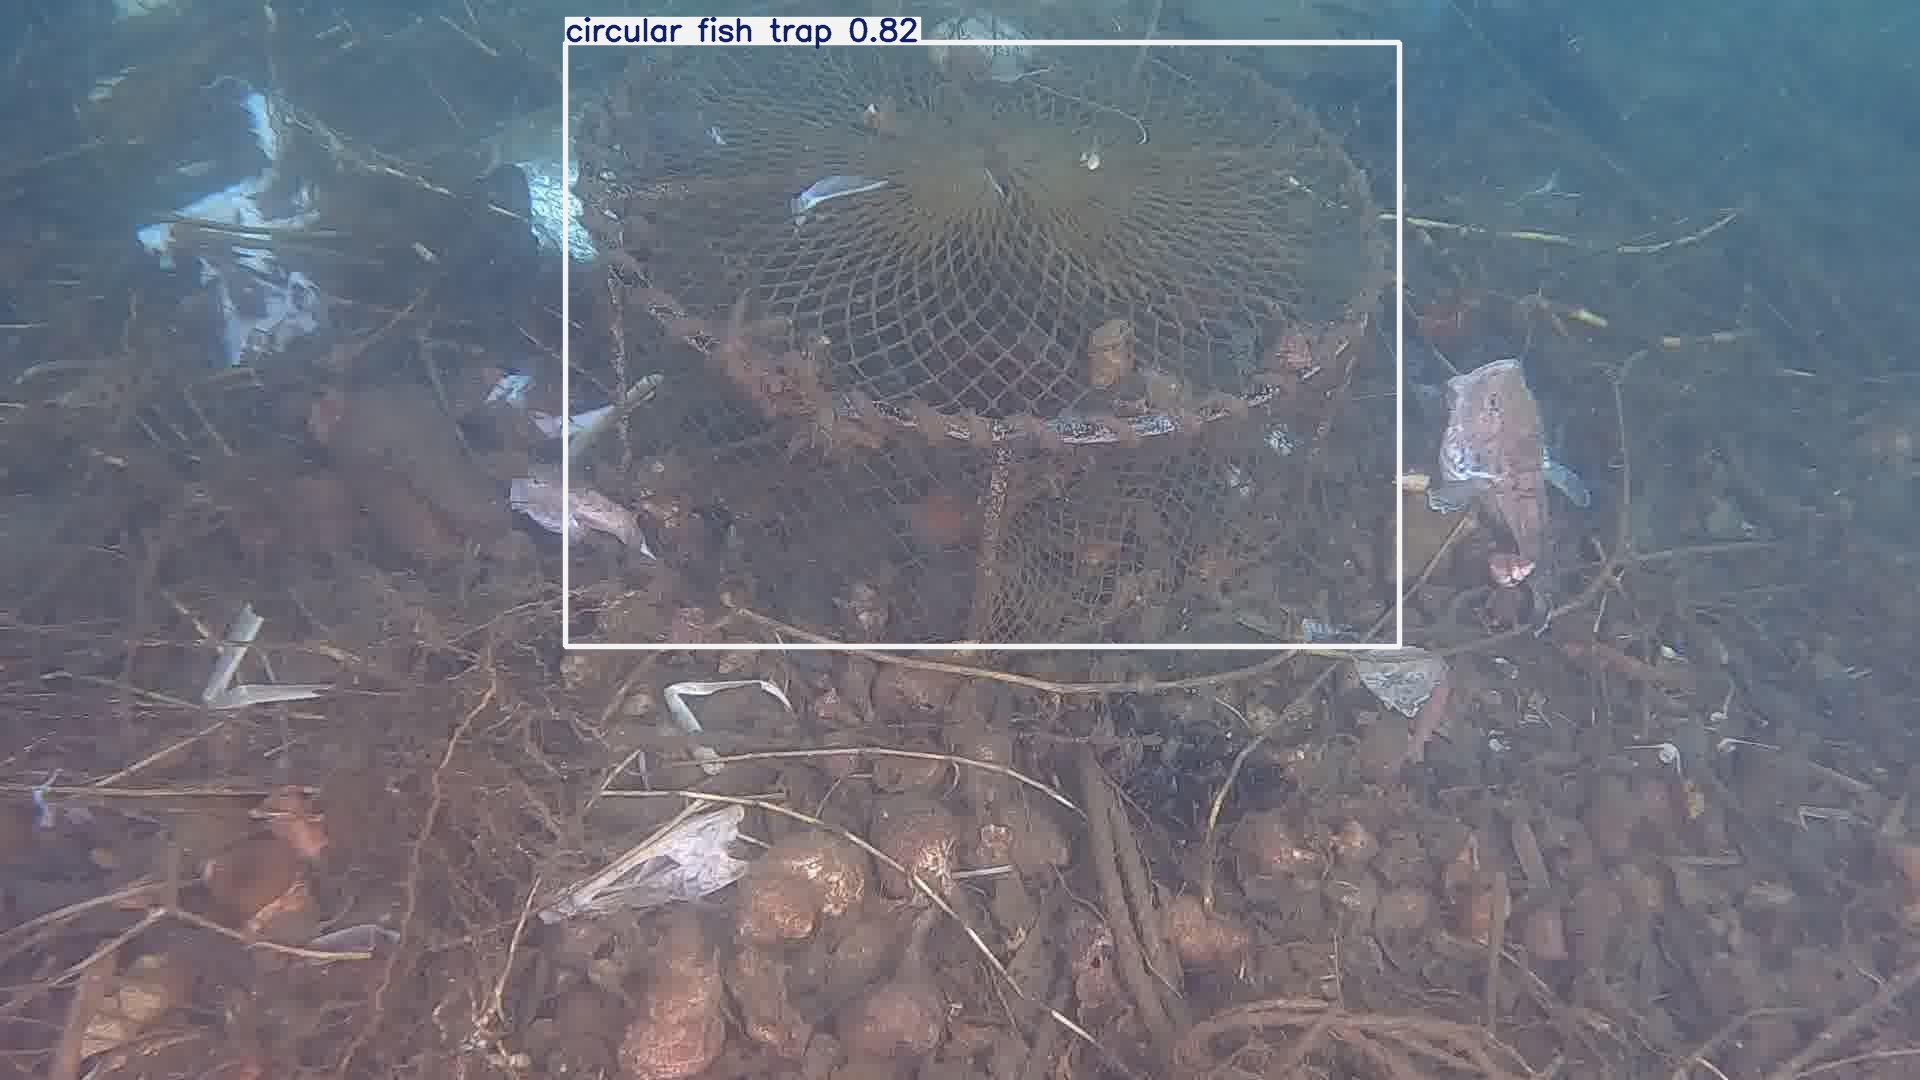

In [18]:
!python detect.py --source "../marine-litter-data/val/images/circular fish trap_044_04615.jpg" --weights runs/train/exp/weights/best.pt --conf 0.25
display(Image(filename="runs/detect/exp2/circular fish trap_044_04615.jpg"))

In [13]:
from google.colab import files
%cd ..
!zip -r yolov5_folder.zip yolov5
files.download("yolov5_folder.zip")

/content
  adding: yolov5/ (stored 0%)
  adding: yolov5/models/ (stored 0%)
  adding: yolov5/models/__init__.py (stored 0%)
  adding: yolov5/models/hub/ (stored 0%)
  adding: yolov5/models/hub/yolov5m6.yaml (deflated 65%)
  adding: yolov5/models/hub/yolov5s6.yaml (deflated 65%)
  adding: yolov5/models/hub/yolov5s-ghost.yaml (deflated 63%)
  adding: yolov5/models/hub/anchors.yaml (deflated 66%)
  adding: yolov5/models/hub/yolov5-panet.yaml (deflated 61%)
  adding: yolov5/models/hub/yolov5-p2.yaml (deflated 66%)
  adding: yolov5/models/hub/yolov5-fpn.yaml (deflated 57%)
  adding: yolov5/models/hub/yolov5s-transformer.yaml (deflated 60%)
  adding: yolov5/models/hub/yolov3-spp.yaml (deflated 63%)
  adding: yolov5/models/hub/yolov3-tiny.yaml (deflated 61%)
  adding: yolov5/models/hub/yolov5-p6.yaml (deflated 66%)
  adding: yolov5/models/hub/yolov3.yaml (deflated 64%)
  adding: yolov5/models/hub/yolov5s-LeakyReLU.yaml (deflated 60%)
  adding: yolov5/models/hub/yolov5x6.yaml (deflated 65%)
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>